In [310]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 

In [326]:
predict_me = [6, 148.0, 72.0, 35.0, 155.0, 33.6, 0.62, 38]
test0 = np.reshape(predict_me, (4, 2))
test0

array([[  6.  , 148.  ],
       [ 72.  ,  35.  ],
       [155.  ,  33.6 ],
       [  0.62,  38.  ]])

In [312]:
dataset = pd.read_csv("KNN_Dataset.csv")

In [313]:
# Replace zeroes
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [314]:
# NaN = dose not exist, no data 
# mean which is integer from dataset column then we repeat the first code line and replace the NaN with mean value
# why? mean is the average person if the data is missing one of the trics is to replace it with average, in this way you can still use the rest of the values to do you computation  
for column in zero_not_accepted:
    dataset[column]= dataset[column].replace(0, np.NaN)
    mean = int(dataset[column].mean(skipna = True))
    dataset[column] = dataset[column].replace(np.NaN, mean)
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [315]:
data_train = dataset.iloc[:, 0:8]
data_test = dataset.iloc[:, 8]
dataset_train, dataset_test, label_train, label_test = train_test_split(data_train, data_test, random_state = 0, test_size = 0.2)

In [328]:
#scaling the data point fit + transform do the same as fit_transform does 
scaling = StandardScaler()
x_train = scaling.fit_transform(dataset_train)
x_test = scaling.transform(dataset_test)
test1 = scaling.fit_transform(test0)
test1

array([[-0.83912985,  1.73112891],
       [ 0.21768859, -0.58798866],
       [ 1.54671783, -0.61672109],
       [-0.92527657, -0.52641916]])

In [317]:
#p = 2 for calculate distance "eucledian", p = 1 for manhatan distance 
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k, p = 2, metric = "euclidean")
    classifier.fit(x_train, label_train)
    classifier.score(x_train, label_train)
    accuracies.append(classifier.score(x_train, label_train))

In [318]:
#predict the test result 
predict = classifier.predict(x_test)
predict_me = [6, 148.0, 72.0, 35.0, 155.0, 33.6, 0.62, 38]
predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [319]:
#evaluate the model 
cm = confusion_matrix(predict, label_test)
print(cm)

[[103  23]
 [  4  24]]


In [320]:
print(f1_score(predict, label_test))

0.64


In [321]:
print(accuracy_score(predict, label_test))

0.8246753246753247


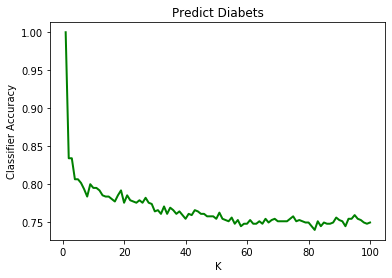

In [322]:
k_list = range(1, 101)
plt.plot(k_list, accuracies, linewidth = 2, color = "green")
plt.title("Predict Diabets")
plt.xlabel("K")
plt.ylabel("Classifier Accuracy")
plt.show()